<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Maria Jose Cantu y Sofia Garcia Mora

**Fecha:** 22 de octubre del 2020.

**Expediente** : if708916 y if714303
    
**Profesor:** Oscar David Jaramillo Zuluaga.

**LINK TAREA:** https://github.com/Sofiagarciaif/Tarea6_CantuM_GarciaS.git

# Tarea7: Clase 14

### Ejercicio 1: 
Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.


#### RESPUESTA SOFIA 

In [29]:
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

def met_estratificado(B:'Cantidad de estratos'):
    U2_est= np.random.rand(B)
    i_est = np.arange(0,B)
    v_est = (U2_est+i_est)/B
    return v_est

#### RESPUESTA MAJO

In [1]:
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

In [3]:
# Integración montecarlo
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

In [2]:
def estratos(a, b, N):
    U2 = np.random.uniform(a,b,N)
    i = np.arange(0,N)
    v = (U2+i)/N
    return v
    

2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:
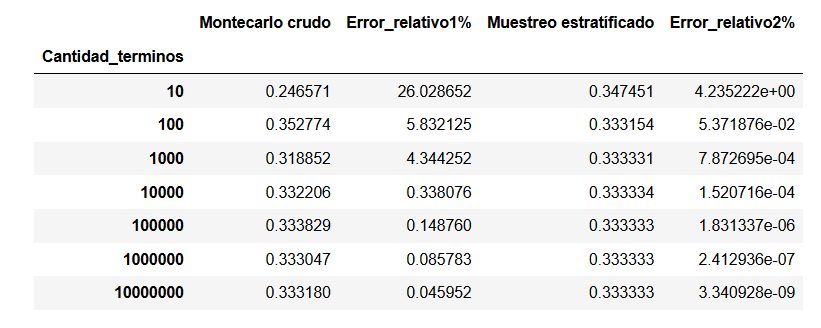

#### RESPUESTA SOFIA 

In [3]:
# Integración montecarlo
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

In [4]:
I = 1/3

# intervalo de integración
a = 0; b = 1

# Cantidad de términos, en escala logarítmica
N = np.logspace(1,7,7,dtype=int) #ELIGE 7 NUMERO ENTRE 1 Y 7
B= N

# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index=N,columns=['Montecarlo Crudo', 'Error_relativo1%', 'Muestreo estratificado', 'Error_relativo2%'], dtype='float')
df.index.name = "Cantidad_terminos"

# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda N:np.random.uniform(a,b,N),N))
ui_est = list(map(lambda B: met_estratificado(B),B))

# Calculamos la aproximación por montecarlo dependiendo de la cantidad de
# términos que hayamos creado con ui
I_m = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui))

# Calculamos la aproximación por el metodo de muestreo estratificado
# dependiendo de la cantidad de términos que hayamos creado con ui_est
I_est = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui_est))

# Mostramos los resultados en la tabla previamente creada
df.loc[N,"Montecarlo Crudo"] = I_m
df.loc[N,"Error_relativo1%"] = np.abs(df.loc[N,"Montecarlo Crudo"]-I)*100/I
df.loc[N,"Muestreo estratificado"] = I_est
df.loc[N,"Error_relativo2%"] = np.abs(df.loc[N,"Muestreo estratificado"]-I)*100/I
df

,Montecarlo Crudo,Error_relativo1%,Muestreo estratificado,Error_relativo2%
Cantidad_terminos,,,,
10,0.304366,8.690076,0.352735,5.820383e+00
100,0.336448,0.934414,0.333370,1.088117e-02
1000,0.341110,2.332886,0.333327,2.016801e-03
10000,0.333498,0.049517,0.333333,2.465738e-04
100000,0.334210,0.263149,0.333333,6.547281e-06
1000000,0.332910,0.126965,0.333333,1.024525e-08
10000000,0.333217,0.034755,0.333333,5.417783e-09


#### RESPUESTA MAJO

In [5]:
I = 1/3
# intervalo de integración
a = 0; b = 1

# Cantidad de términos, en escala logarítmica
N = np.logspace(1,7,7,dtype=int)

# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index=N,columns=['Montecarlo Crudo', 'Error_relativo1%', 'Muestreo estratificado', 'Error_relativo2%'], dtype='float')
df.index.name = "Cantidad_terminos"

# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda N:np.random.uniform(a,b,N),N)) #Montecarlo Crudo
ui_est = list(map(lambda N: estratos(a,b,N),N)) #Estratificado

# Calculamos la aproximación por montecarlo dependiendo de la cantidad de
# términos que hayamos creado con ui
I_m = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui)) #Montecarlo
I_m_est = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui_est)) #Estratificado

# Mostramos los resultados en la tabla previamente creada
df.loc[N,"Montecarlo Crudo"] = I_m
df.loc[N,"Error_relativo1%"] = np.abs(df.loc[N,"Montecarlo Crudo"]-I)*100/I

df.loc[N,"Muestreo estratificado"] = I_m_est
df.loc[N,"Error_relativo2%"] = np.abs(df.loc[N,"Muestreo estratificado"]-I)*100/I
df

,Montecarlo Crudo,Error_relativo1%,Muestreo estratificado,Error_relativo2%
Cantidad_terminos,,,,
10,0.249230,25.230962,0.313879,5.836327e+00
100,0.441810,32.542851,0.333674,1.023314e-01
1000,0.325341,2.397702,0.333340,2.007848e-03
10000,0.335039,0.511837,0.333333,7.847706e-05
100000,0.335053,0.515837,0.333333,3.815474e-07
1000000,0.333029,0.091444,0.333333,1.335098e-07
10000000,0.333472,0.041490,0.333333,4.003431e-09


# <font color = red> Tarea
**Esta tarea incluye el ejercicio dejado en la clase anterior**
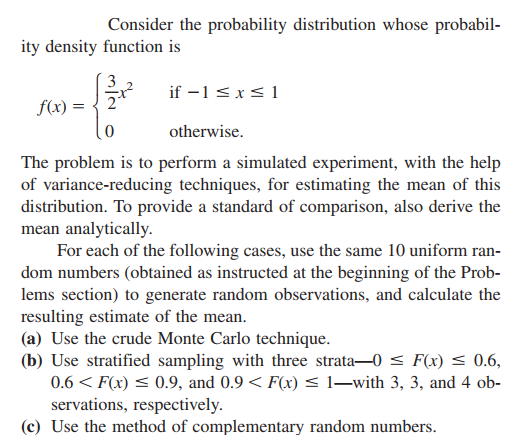
Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.

#### RESPUESTA SOFI



PARA ENCONTRAR LA ACUMULADA --> INTEGRAL DE -1 (1 POR COMO ESTA DEFINIDA) A X 

$$F(x)=\int_{-1}^{x}\frac{3}{2}y^2\text{d}y=\left.\frac{y^3}{2}\right|_{-1}^{x}=\frac{x^3}{2}-\frac{(-1)^3}{2}$$

IGUALAR A U Y DESPEJAR X-->
CON ESA EXPRESION OBTENER VARIABLES ALEATORIAS 

$$ U = \frac{x^3}{2}+\frac{1}{2}$$

$$ U - \frac{1}{2} = \frac{x^3}{2}$$

$$ x^3 = 2(U - \frac{1}{2})  $$

$$ x = \sqrt[3]{2U - 1)}$$

In [5]:
# Cantidad de términos
N = 10

In [20]:
def f(x):
    if -1 <= x <= 1:
        f = (3/2)*x**2
    else:
        f = 0
    return f

#FUNCION INVERSA
F= lambda u: np.cbrt(2*u-1)



In [21]:
# 1. Montecarlo crudo
u1 = np.random.rand(N)
F_u1 = list(map(F,u1))
media_montecarlo = np.array(F_u1)

print('Media con el método de montecarlo crudo = ', media_montecarlo.mean())

Media con el método de montecarlo crudo =  -0.36997195618889855


$$w1=\frac{3/10}{0.6}$$

$$w2=\frac{3/10}{0.3}$$

$$w3=\frac{4/10}{0.1}$$

In [23]:
# 2. Método estratificado 
#genero aleatorios 
r1 = np.random.uniform(0,0.6,3)
r2 = np.random.uniform(0.6,0.9,3)
r3 = np.random.uniform(0.9,1,4)
#PONGO ALEATORIOS EN UNA LISTA 
r  = [r1,r2,r3]
m  = range(len(r))  # Cantidad de estratos
w  = [1/2,1,4]
#FUNCION PARA GENERAR VARIABLES ALEATORIAS 
xi = list(map(F, r))
#CADA UNO DE LOS Xi CORRESPONDIENTES DIVIDIERLO ENTRE W
muestras = list(map(lambda wi,xi:xi/wi,w,xi))

print('Media con el método estratificado =',np.concatenate(muestras).mean())

Media con el método estratificado = -0.09265400685735922


In [24]:
# 3. Método números complementarios
u2 = 1 - u1[:int(N/2)]
f_u2 = list(map(F, u2))
media_complementario = (np.mean(f_u2) + media_montecarlo[:int(N/2)].mean()) / 2

print('Media con el método de números complementarios = ', media_complementario)

Media con el método de números complementarios =  0.0


In [30]:
# 4. Método estretos igualmente estratificados B= 2,4,6,10

#2 estratos
u_est_2=met_estratificado(2)
estratos_2=F(u_est_2).mean()

#4 estratos
u_est_4=met_estratificado(4)
estratos_4=F(u_est_4).mean()

#6 estratos
u_est_6=met_estratificado(6)
estratos_6=F(u_est_6).mean()

#10 estratos
u_est_10=met_estratificado(10)
estratos_10=F(u_est_10).mean()

print('Media con el método estratificado con 2 estratos =', estratos_2)
print('Media con el método estratificado con 4 estratos =', estratos_4)
print('Media con el método estratificado con 6 estratos =', estratos_6)
print('Media con el método estratificado con 10 estratos =', estratos_10)

Media con el método estratificado con 2 estratos = 0.06901718534248308
Media con el método estratificado con 4 estratos = -0.04855422599930914
Media con el método estratificado con 6 estratos = -0.048494845010773724
Media con el método estratificado con 10 estratos = -0.013965920832554879


#### RESPUESTA MAJO

$$F(x)=\int_{-1}^{x}\frac{3}{2}y^2\text{d}y=\left.\frac{y^3}{2}\right|_{y=-1}^{y=x}=\frac{x^3}{2}-\frac{(-1)^3}{2}$$

>$$ U = \frac{x^3}{2}+\frac{1}{2}$$
>
> $$ U - \frac{1}{2} = \frac{x^3}{2}$$
>
> $$ 2(U - \frac{1}{2}) = x^3 $$
>
> $$ x = \sqrt[3]{2(U - \frac{1}{2})}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
f = lambda x: (3/2)*x**2 if x>= -1 and x <= 1 else 0
xi = lambda u: (2*(u-0.5))**(1/3) if u > 0.5 else -(2*(0.5-u))**(1/3)

In [16]:
# a) MONTECARLO CRUDO
np.random.seed(100)
N = 10
a =  np.random.uniform(0, 1, N)

muestra = np.asarray(list(map(xi, a)))

muestra.mean()

-0.06783350231646393

In [21]:
#b METODO ESTRATIFICADO
N=10
np.random.seed(3)
e1=np.random.uniform(0,.6,3) #Creando estratos conforme al problema
e2=np.random.uniform(.6,.9,3)
e3=np.random.uniform(.9,1,4)
r=[e1,e2,e3]
w1=(3/N)/.6 #Creando los pesos
w2=(3/N)/.3
w3=(4/N)/.1
w=[w1,w2,w3]
xi=list(map(lambda x:3/2*x**2,r))
xi=np.concatenate(list(map(lambda x,w:x/w,xi,w)))
xi=np.mean(xi)
xi #valor de la integral 


0.5345646815617664

In [23]:
# c) METODO NUMEROS COMPLEMENTARIOS
f=lambda x: 3/2*x**2
ui=[1-u if u>=0 else -(1+u) for u in u ] #Esto lo hacemos porque ya no es de 0-1 si no de -1 a 1
m_c=np.mean([f(i) for i in ui])# la media complementaria

m_n=np.mean([f(i) for i in u])
m3=(m_n+m_c)/2
m3


0.5161656398038396

In [3]:
def estratos(a, b, N):
    U2 = np.random.uniform(a,b,N)
    i = np.arange(0,N)
    v = (U2+i)/N
    return v

In [14]:
a=-1
b=1
f=lambda x: 3/2*x**2
u_est_2=estratos(a,b,2)
estratos_2=f(u_est_2).mean()
u_est_4=estratos(a,b,4)
estratos_4=f(u_est_4).mean()
u_est_6=estratos(a,b,6)
estratos_6=f(u_est_6).mean()
u_est_10=estratos(a,b,10)
estratos_10=f(u_est_10).mean()
estratos_2,estratos_4,estratos_6,estratos_10

(0.09858078267583335,
 0.45682466937247873,
 0.359825374214996,
 0.42930972008609236)